## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization, and unit vector normalization in Python
* Identify appropriate normalization and scaling techniques for a given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168AB933CF8>,
      dtype=object)

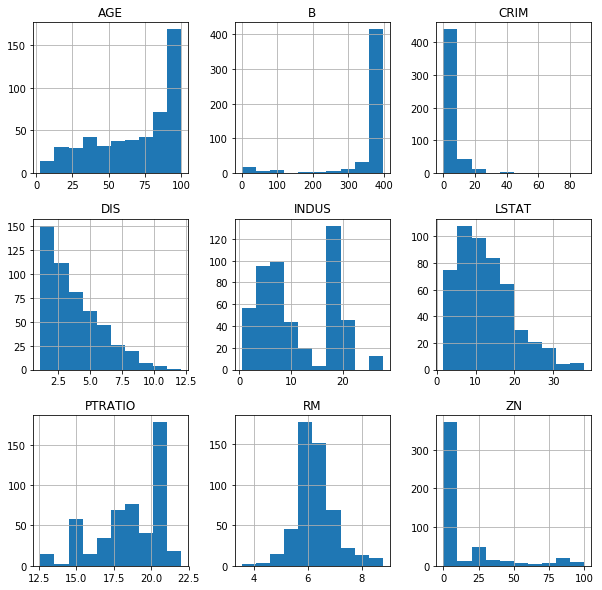

In [4]:
boston_features.head()
boston_features[['CRIM','ZN','INDUS','RM','AGE','DIS','PTRATIO','B','LSTAT']].hist(figsize=(10,10))

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

In [5]:
# Looks like we can try log transform for AGE, B, CRIM, DIS, LSTAT, & ZN. 
# Let's leave RM and INDUS alone, looks like a log transform wouldn't do much there.

# Create df to store log transformed variables
data_log = pd.DataFrame([])
data_log['CRIM'] = np.log(boston_features['CRIM'])
data_log['DIS'] = np.log(boston_features['DIS'])
data_log['LSTAT'] = np.log(boston_features['LSTAT'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168ABEB4940>,
      dtype=object)

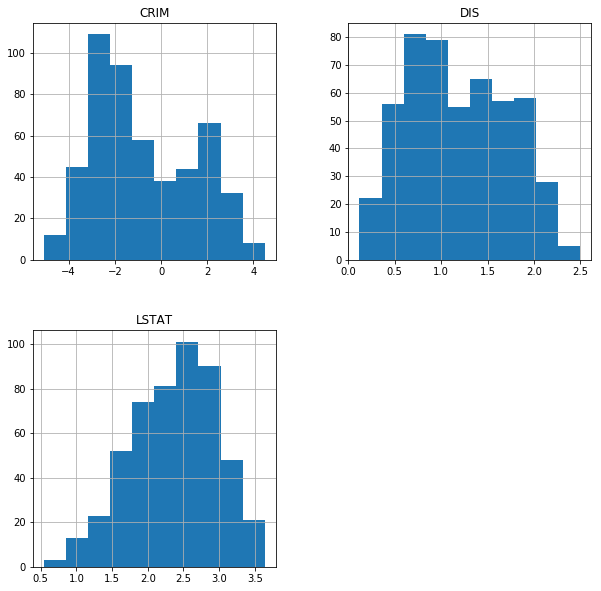

In [6]:
data_log.hist(figsize=(10,10))

In [ ]:
# looks like we are not really going to be able to improve 'AGE', 'B', or 'ZN' to fit normal distributions

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [ ]:
# Your code here

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [7]:
boston_features = boston_features.drop(['CRIM', 'DIS', 'LSTAT'], axis=1)

In [9]:
final_features = pd.concat([boston_features, data_log], axis=1)

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` DataFrame.

In [10]:
final_features.head()

,ZN,INDUS,CHAS,RM,AGE,PTRATIO,B,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]",CRIM,DIS,LSTAT
0,18.0,2.31,0.0,6.575,65.2,15.3,396.90,0,0,0,1,0,0,0,-5.064036,1.408545,1.605430
1,0.0,7.07,0.0,6.421,78.9,17.8,396.90,0,0,0,0,0,0,0,-3.600502,1.602836,2.212660
2,0.0,7.07,0.0,7.185,61.1,17.8,392.83,0,0,0,0,0,0,0,-3.601235,1.602836,1.393766
3,0.0,2.18,0.0,6.998,45.8,18.7,394.63,0,0,0,0,0,0,0,-3.430523,1.802073,1.078410
4,0.0,2.18,0.0,7.147,54.2,18.7,396.90,0,0,0,0,0,0,0,-2.672924,1.802073,1.673351
